# PROYEK ANALISIS DATA: BIKE SHARING DATASET
- **Nama:** Daniela Natali Putri
- **Email:** danielanputri@@gmail.com
- **ID Dicoding:** Daniela N

## Menentukan Pertanyaan Bisnis
* Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
* Bagaimana performa peminjaman sepeda perbulan pada tahun 2011 hingga 2012?
* Berapa perbandingan dan persentase pengguna yang merupakan pelanggan terdaftar (registered) dibandingkan pengguna kasual (casual)?
* Pada jam berapa penggunaan sepeda mencapai puncaknya dalam sehari? [NEW]
* Sejauh mana suhu memengaruhi pilihan seseorang untuk bersepeda? [NEW]

## Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Data Gathering

#### Read Dataset bike_sharing_day_df

In [9]:
bike_sharing_day_df = pd.read_csv("data/bike_sharing_day.csv")
bike_sharing_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Read Dataset bike_sharing_hour_df

In [12]:
bike_sharing_hour_df = pd.read_csv("data/bike_sharing_hour.csv")
bike_sharing_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<b>Insight:</b> <br>
Data yang harus dimuat adalah data dari Tabel Bike Sharing Day dan Tabel Bike Sharing Hour. Kedua tabel di atas masing-masing menampilkan 5 baris pertama dari DataFrame bike_sharing_day_df dan DataFrame bike_sharing_hour_df.

<b>Penjelasan Dataset:</b>
- instant: Number of data.
- season: Season of the year, coded as Spring=1, Summer=2, Autumn=3, Winter=4.
- mnth: Month of the year, coded from 0 to 12, where January=1, February=2, March=3, etc.
- day: Day of the year, from 1 to 365.
- hr: Hour of the day, coded as a factor from 0 to 23.
- holiday: Is it a holiday? Yes=1, No=0.
- weekday: Day of the week, coded from 0 to 6, where Sunday=0, Monday=1, Tuesday=2, etc.
- workingday: Is it a work day? Yes=1, No=0.
- weathersit: Weather, coded as a Clear=1, MistCloud=2, LightRainSnow=3, HeavyRainSnow=4.
- temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39.
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50.
- hum: Normalized humidity. The values are divided to 100 (max).
- windspeed: Normalized wind speed. The values are divided by 67 (max).
- casual: Number of casual bikers.
- registered: Number of registered bikers.
- bikers: Total number of bikers.

## Data Assesing

### Menilai data bike_sharing_day_df

In [17]:
# Mengecek tipe data DataFrame bike_sharing_day_df
bike_sharing_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [19]:
# Mengecek duplikasi data DataFrame bike_sharing_day_df
print("Jumlah duplikasi data: ", bike_sharing_day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [21]:
# Mengecek missing value DataFrame bike_sharing_day_df
bike_sharing_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [23]:
# Mengecek statistik DataFrame bike_sharing_day_df
bike_sharing_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai data bike_sharing_hour_df

In [26]:
# Mengecek tipe data DataFrame bike_sharing_hour_df
bike_sharing_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [28]:
# Mengecek duplikasi data DataFrame bike_sharing_hour_df
print("Jumlah duplikasi data: ", bike_sharing_hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [30]:
# Mengecek missing value DataFrame bike_sharing_hour_df
bike_sharing_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [32]:
# Mengecek statistik DataFrame bike_sharing_hour_df
bike_sharing_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<b> Insight: </b> <br>
- Terdapat sedikit kesalahan tipe data pada kolom dteday. Kolom dteday seharusnya bertipe data datetime bukan object.
- Tidak terdapat missing value pada kedua DataFrame.
- Tidak terdapat duplikasi data pada kedua DataFrame.
- Tidak terdapat keanehan dalam deskripsi/statistik DataFrame (count, mean, min, dan max).

## Data Cleaning

**Berdasarkan insight dan keterangan pada Data Assessing di atas, disini saya akan melakukan beberapa Data Cleaning, yaitu:**
- Mengubah tipe data object pada kolom 'dteday' menjadi tipe data datetime.
- Mengubah tipe data int pada kolom 'season', 'mnth', 'weekday', 'weathersit' menjadi tipe data categorical.
- Mengubah nama kolom dengan nama yang sesuai agar lebih dapat dimengerti.
- Menghapus kolom yang tidak digunakan yaitu 'holiday' dan 'atemp'.
- Mengubah isi kolom agar lebih mudah dipahami.

In [37]:
print("Informasi tipe data: ", bike_sharing_hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Informasi tipe data:  None


In [39]:
print("Informasi tipe data: ", bike_sharing_day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Informasi tipe data:  None


#### Mengubah Tipe Data Object pada dteday menjadi Datetime

In [42]:
#ubah tipe data dteday pada Day dataframe 
datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_sharing_day_df[column] = pd.to_datetime(bike_sharing_day_df[column])

In [44]:
print(bike_sharing_day_df.dteday.dtypes)

datetime64[ns]


In [46]:
#ubah tipe data dteday pada Hour dataframe 
datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_sharing_hour_df[column] = pd.to_datetime(bike_sharing_hour_df[column])

In [48]:
print(bike_sharing_day_df.dteday.dtypes)

datetime64[ns]


#### Mengubah tipe data int 'season', 'month', 'day', 'weather' menjadi kategorikal

In [51]:
columns = ['season', 'mnth', 'weekday', 'weathersit']
 
for column in columns:
    bike_sharing_day_df[column] = bike_sharing_day_df[column].astype("category")
    bike_sharing_hour_df[column] = bike_sharing_hour_df[column].astype("category")

#### Mengubah nama kolom

In [54]:
bike_sharing_day_df.rename(columns={'instant':'no', 'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'workingday':'day_type', 'weathersit':'weather', 'temp':'temperature', 'windspeed':'wind_speed', 'hum':'humidity', 'cnt':'count'}, inplace=True)
bike_sharing_hour_df.rename(columns={'instant':'no', 'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day', 'workingday':'day_type', 'weathersit':'weather', 'temp':'temperature', 'windspeed':'wind_speed', 'hum':'humidity', 'cnt':'count'}, inplace=True)

#### drop kolom 'holiday'

In [57]:
bike_sharing_day_df.drop(['holiday'], axis = 1, inplace= True)
bike_sharing_hour_df.drop(['holiday'], axis = 1, inplace= True)

#### mengubah isi kolom menjadi seperti cluster/perwakilan agar lebih dipahami

In [60]:
# Mengubah isi kolom 'season' menjadi: 1=Spring, 2=Summer, 3=Autumn, 4=Winter
bike_sharing_day_df.season.replace((1,2,3,4), ('Spring','Summer','Autumn','Winter'), inplace=True)
bike_sharing_hour_df.season.replace((1,2,3,4), ('Spring','Summer','Autumn','Winter'), inplace=True)

# Mengubah isi kolom 'year' menjadi: 0=2011, 1=2012
bike_sharing_day_df.year.replace((0,1), ('2011','2012'), inplace=True)
bike_sharing_hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Mengubah isi kolom 'month' menjadi: 1=January, 2=February, 3=March, etc.
bike_sharing_day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)
bike_sharing_hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)

# Mengubah isi kolom 'day' menjadi: 0=Sunday, 1=Monday, 2=Tuesday, 3=Wednesday, 4=Thursday, 5=Friday, 6=Saturday
bike_sharing_day_df.day.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike_sharing_hour_df.day.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Mengubah isi kolom 'day_type' menjadi: 0=Weekend, 1=Weekday
bike_sharing_day_df.day_type.replace((0,1), ('Weekend','Weekday'), inplace=True)
bike_sharing_hour_df.day_type.replace((0,1), ('Weekend','Weekday'), inplace=True)

# Mengubah isi kolom 'weather' menjadi: 1=Clear, 2=MistCloud, 3=Light_RainSnow 4=Heavy_RainSnow
bike_sharing_day_df.weather.replace((1,2,3,4), ('Clear','MistCloud','LightRainSnow','HeavyRainSnow'), inplace=True)
bike_sharing_hour_df.weather.replace((1,2,3,4), ('Clear','MistCloud','LightRainSnow','HeavyRainSnow'), inplace=True)

# Mengubah isi kolom 'temperature' menjadi ke dalam derajat celcius(C):
bike_sharing_day_df['temperature'] = (bike_sharing_day_df['temperature']*(39-(-8)))+(-8)
bike_sharing_hour_df['temperature'] = (bike_sharing_hour_df['temperature']*(39-(-8)))+(-8)

# Mengubah isi kolom 'humidity' menjadi x100:
bike_sharing_day_df['humidity'] = bike_sharing_day_df['humidity']*100
bike_sharing_hour_df['humidity'] = bike_sharing_hour_df['humidity']*100

C:\Users\LENOV\AppData\Local\Temp\ipykernel_2292\1052510977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_sharing_day_df.season.replace((1,2,3,4), ('Spring','Summer','Autumn','Winter'), inplace=True)
C:\Users\LENOV\AppData\Local\Temp\ipykernel_2292\1052510977.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories inste

#### Hasil Data Cleaning dari Kedua Dataframe

* Bike Sharing Day Dataframe

In [64]:
bike_sharing_day_df.head()

,no,date,season,year,month,day,day_type,weather,temperature,atemp,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,Saturday,Weekend,MistCloud,8.175849,0.363625,80.5833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Sunday,Weekend,MistCloud,9.083466,0.353739,69.6087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Monday,Weekday,Clear,1.229108,0.189405,43.7273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Tuesday,Weekday,Clear,1.400000,0.212122,59.0435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Wednesday,Weekday,Clear,2.666979,0.229270,43.6957,0.186900,82,1518,1600


* Bike Sharing Hour Dataframe

In [67]:
bike_sharing_hour_df.head()

,no,date,season,year,month,hour,day,day_type,weather,temperature,atemp,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,Weekend,Clear,3.28,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Saturday,Weekend,Clear,2.34,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Saturday,Weekend,Clear,2.34,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Saturday,Weekend,Clear,3.28,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Saturday,Weekend,Clear,3.28,0.2879,75.0,0.0,0,1,1


**Insight:**
- Berhasil mengubah tipe data object pada kolom 'dteday' menjadi tipe data datetime.
- Berhasil mengubah nama kolom.
- Berhasil menghapus kolom 'holiday' dan 'atemp' karena tidak digunakan.
- Mengetahui arti/isi tiap kolom dan berhasil mengubah tipe data int pada kolom 'season', 'mnth', 'weekday', 'weathersit' menjadi tipe data categorical.
- Mengetahui arti/isi tiap kolom, saya berhasil mengubah isi kolom agar lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore Data
Pada tahap ini dataframe yang sudah dibersihkan akan dieksplorasi untuk mengenali data lebih lanjut

* Bike Sharing Day

In [73]:
bike_sharing_day_df.describe(include="all")

,no,date,season,year,month,day,day_type,weather,temperature,atemp,humidity,wind_speed,casual,registered,count
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Autumn,2012,January,Sunday,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.283085,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-5.220871,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.842925,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.421651,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22.804575,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,32.498349,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000


Pada rangkuman statistik diatas, data peminjaman sepeda sejak 2011 hingga 2012 terdapat jumlah peminjam sepeda paling sedikit dalam satu hari adalah 22 orang dan jumlah peminjam sepeda terbanyak dalam satu hari adalah 8714 orang dengan standar deviasinya sebesar 1937.211452.

In [76]:
# Jumlah penggunaan sepeda berdasarkan 'season'
bike_sharing_day_df.groupby('season', observed=True)['count'].sum().reset_index().head(4)

,season,count
0,Spring,471348
1,Summer,918589
2,Autumn,1061129
3,Winter,841613


In [78]:
# Jumlah penggunaan sepeda berdasarkan 'month'
bike_sharing_day_df.groupby('month', observed=True)['count'].sum().reset_index().head(12)

,month,count
0,January,134933
1,February,151352
2,March,228920
3,April,269094
4,May,331686
5,June,346342
6,July,344948
7,August,351194
8,September,345991
9,October,322352


In [80]:
# Jumlah penggunaan sepeda berdasarkan 'day_type'
bike_sharing_day_df.groupby('day', observed=True)['count'].sum().reset_index().head(12)

,day,count
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thursday,485395
5,Friday,487790
6,Saturday,477807


In [82]:
# Jumlah penggunaan sepeda berdasarkan 'day_type'
bike_sharing_day_df.groupby('day_type', observed=True)['count'].sum().reset_index().head(12)

,day_type,count
0,Weekday,2292410
1,Weekend,1000269


In [84]:
# Jumlah penggunaan sepeda berdasarkan 'weather'
bike_sharing_day_df.groupby('weather', observed=True)['count'].sum().reset_index().head(4)

,weather,count
0,Clear,2257952
1,MistCloud,996858
2,LightRainSnow,37869


* Bike Sharing Hour Day

In [87]:
bike_sharing_hour_df.describe(include="all")

,no,date,season,year,month,hour,day,day_type,weather,temperature,atemp,humidity,wind_speed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Autumn,2012,May,NaN,Saturday,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,15.358397,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-7.060000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,7.980000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,15.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,23.020000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,39.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000


Pada rangkuman statistik diatas, data peminjaman sepeda sejak 2011 hingga 2012 memiliki jumlah peminjam sepeda paling sedikit dalam satu jam adalah 1 orang dan jumlah peminjam sepeda terbanyak dalam satu jam adalah 977 orang dengan standar deviasinya sebesar 181.387599.

In [90]:
# Jumlah penggunaan sepeda berdasarkan 'casual' dan 'registered' dalam jangkauan 'hour'
bike_sharing_hour_df.groupby(by='hour').agg({
    'registered': ['sum'],
    'casual': ['sum'],
    'count': ['sum']
})

,registered,casual,count
,sum,sum,sum
hour,,,
0,31755,7375,39130
1,19455,4709,24164
2,12940,3412,16352
3,6281,1893,8174
4,3554,874,4428
5,13249,1012,14261
6,52115,3017,55132
7,146134,8037,154171


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

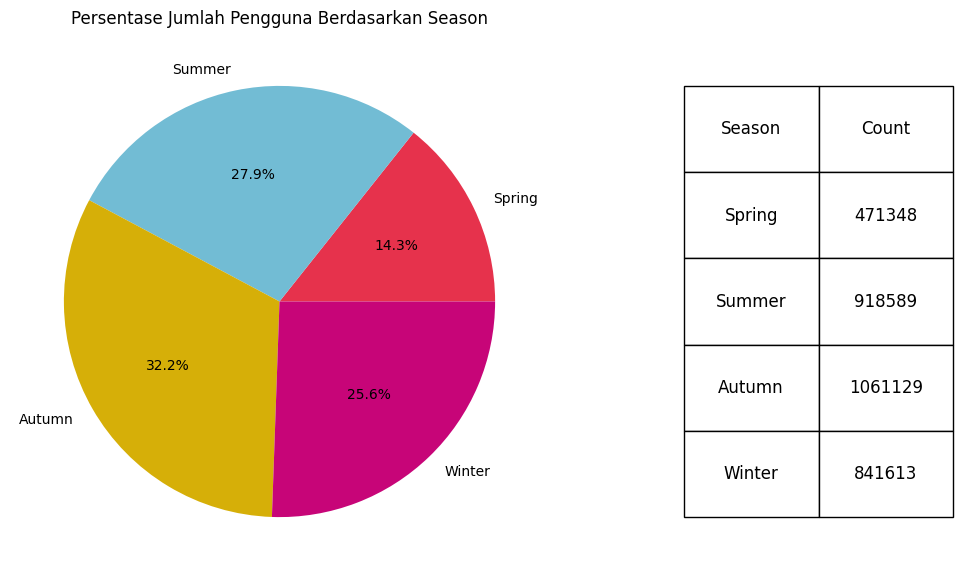

In [94]:
# Mengelompokkan data berdasarkan kolom 'season' dan menjumlahkan kolom 'count'
season_count = bike_sharing_day_df.groupby('season', observed=True)['count'].sum().reset_index()

data = season_count['count'].values
labels = season_count['season'].astype(str)  # Mengubah indeks season ke string

# Membuat figure dengan ukuran yang sesuai
fig, ax = plt.subplots(figsize=(10, 7))

# Membuat pie plot dengan persentase
ax.pie(data, labels=labels, autopct='%1.1f%%', colors=["#E6324C", "#72BCD4", "#D6AF08", "#C70578"])

# Menampilkan pie plot
ax.set_title('Persentase Jumlah Pengguna Berdasarkan Season')

# Menambahkan tabel di sebelah kanan pie chart
table_data = season_count.values  # Mengambil nilai tabel
table = plt.table(cellText=table_data,
                  colLabels=['Season', 'Count'],
                  cellLoc='center',
                  loc='right',
                  bbox=[1.25, 0.1, 0.5, 0.8])  # Mengatur posisi dan ukuran tabel

# Menampilkan tabel
table.auto_set_font_size(False)
table.set_fontsize(12)

# Menampilkan plot
plt.show()

**Insight:** <br>
Berdasarkan visualization data di atas, jumlah pengguna sepeda paling banyak pada musim Autumn dan paling sedikit pada musim Spring. Ini menandakan bahwa pengguna disana lebih menyukai musim Autumn dari pada musim Spring. Perbedaanyapun cukup signifikan yaitu Autumn 32.2% dan Spring 14.3%.

### Pertanyaan 2: Bagaimana performa peminjaman sepeda perbulan pada tahun 2011 hingga 2012?

In [98]:
hour_df = bike_sharing_hour_df.copy()
hour_df = hour_df[['date', 'year', 'month', 'hour', 'day',  'season', 'weather','count', 'registered', 'casual']]

print(hour_df)

            date  year     month  hour       day  season    weather  count  \
0     2011-01-01  2011   January     0  Saturday  Spring      Clear     16   
1     2011-01-01  2011   January     1  Saturday  Spring      Clear     40   
2     2011-01-01  2011   January     2  Saturday  Spring      Clear     32   
3     2011-01-01  2011   January     3  Saturday  Spring      Clear     13   
4     2011-01-01  2011   January     4  Saturday  Spring      Clear      1   
...          ...   ...       ...   ...       ...     ...        ...    ...   
17374 2012-12-31  2012  December    19    Monday  Spring  MistCloud    119   
17375 2012-12-31  2012  December    20    Monday  Spring  MistCloud     89   
17376 2012-12-31  2012  December    21    Monday  Spring      Clear     90   
17377 2012-12-31  2012  December    22    Monday  Spring      Clear     61   
17378 2012-12-31  2012  December    23    Monday  Spring      Clear     49   

       registered  casual  
0              13       3  
1      

In [100]:
monthly_rentals = hour_df.groupby(['year', 'month'], observed=True)[['count', 'registered', 'casual']].sum().reset_index()

monthly_rentals = monthly_rentals[['year', 'month', 'count', 'registered', 'casual']]

print(monthly_rentals)


    year      month   count  registered  casual
0   2011    January   38189       35116    3073
1   2011   February   48215       41973    6242
2   2011      March   64045       51219   12826
3   2011      April   94870       72524   22346
4   2011        May  135821      104771   31050
5   2011       June  143512      112900   30612
6   2011       July  141341      104889   36452
7   2011     August  136691      107849   28842
8   2011  September  127418      100873   26545
9   2011    October  123511       98289   25222
10  2011   November  102167       86573   15594
11  2011   December   87323       78875    8448
12  2012    January   96744       87775    8969
13  2012   February  103137       94416    8721
14  2012      March  164875      133257   31618
15  2012      April  174224      135768   38456
16  2012        May  195865      151630   44235
17  2012       June  202830      159536   43294
18  2012       July  203607      161902   41705
19  2012     August  214503      171306 

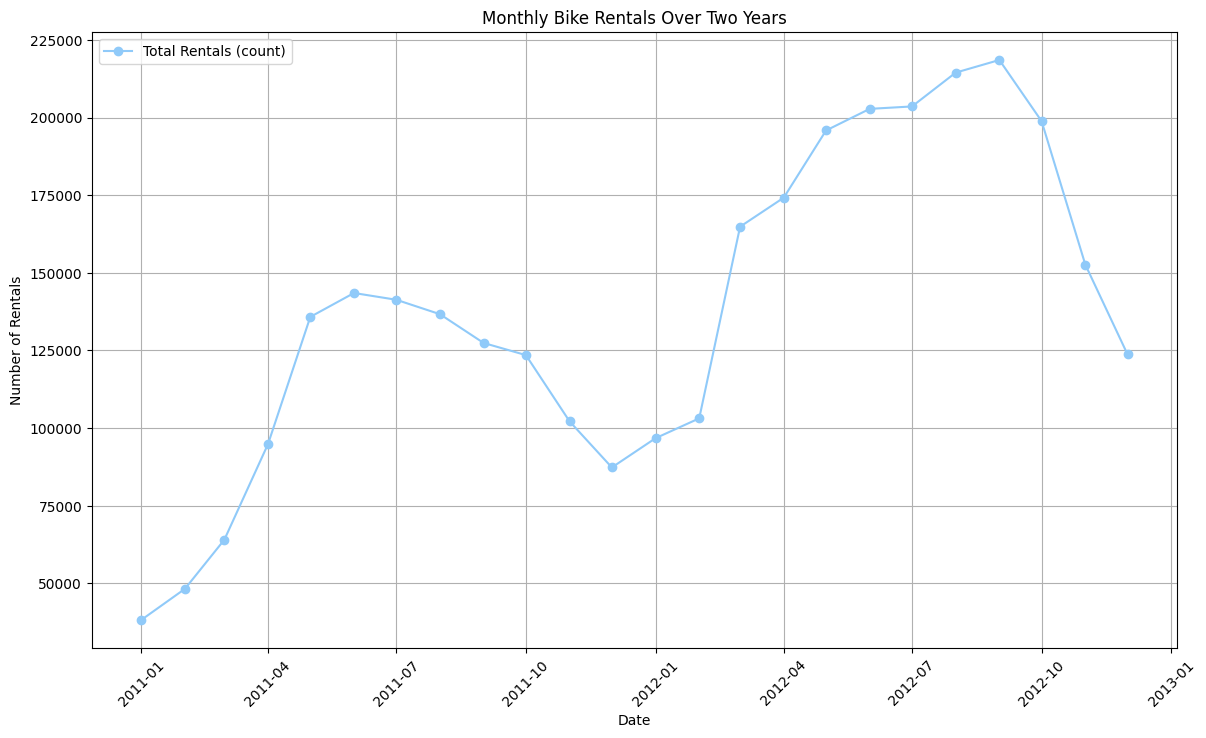

In [102]:
# monthly_rentals['time'] = monthly_rentals['year'] + '-' + monthly_rentals['month']
# monthly_rentals['time'] = pd.to_datetime(monthly_rentals['time'], format='%Y-%B')
# monthly_rentals = monthly_rentals.sort_values('ri')

# Convert 'year' and 'month' to string and concatenate them
monthly_rentals['time'] = monthly_rentals['year'].astype(str) + '-' + monthly_rentals['month'].astype(str)

# Convert 'time' to datetime
monthly_rentals['datetime'] = pd.to_datetime(monthly_rentals['time'], format='%Y-%B')

# Sort by 'date'
monthly_rentals = monthly_rentals.sort_values('datetime')

plt.figure(figsize=(14, 8))
plt.plot(monthly_rentals['datetime'], monthly_rentals['count'], marker='o', label='Total Rentals (count)', color='#90CAF9')
plt.title('Monthly Bike Rentals Over Two Years')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Performa peminjaman sepeda sepanjang tahun 2011 ini pada kuartal pertama mencatatkan peningkatan yang cukup baik, diikuti oleh lonjakan signifikan pada kuartal kedua. Namun terjadi penurunan jumlah peminjam pada kuartal ketiga meskipun tidak terlalu pesat tetapi terus belanjut hingga kuartal 4 yang mana penurunannya lebih drastis.
Beralih ke tahun 2012, performa peminjaman sepeda menunjukkan tren yang lebih positif dengan kenaikan yang sangat signifikan pada akhir kuartal pertama yang terus berlanjut hingga kuartal ketiga, namun terjadi penurunan lagi pada kuartal keempat.

### Pertanyaan 3: Berapa perbandingan dan persentase pengguna yang merupakan pelanggan terdaftar (registered) dibandingkan pengguna kasual (casual)?

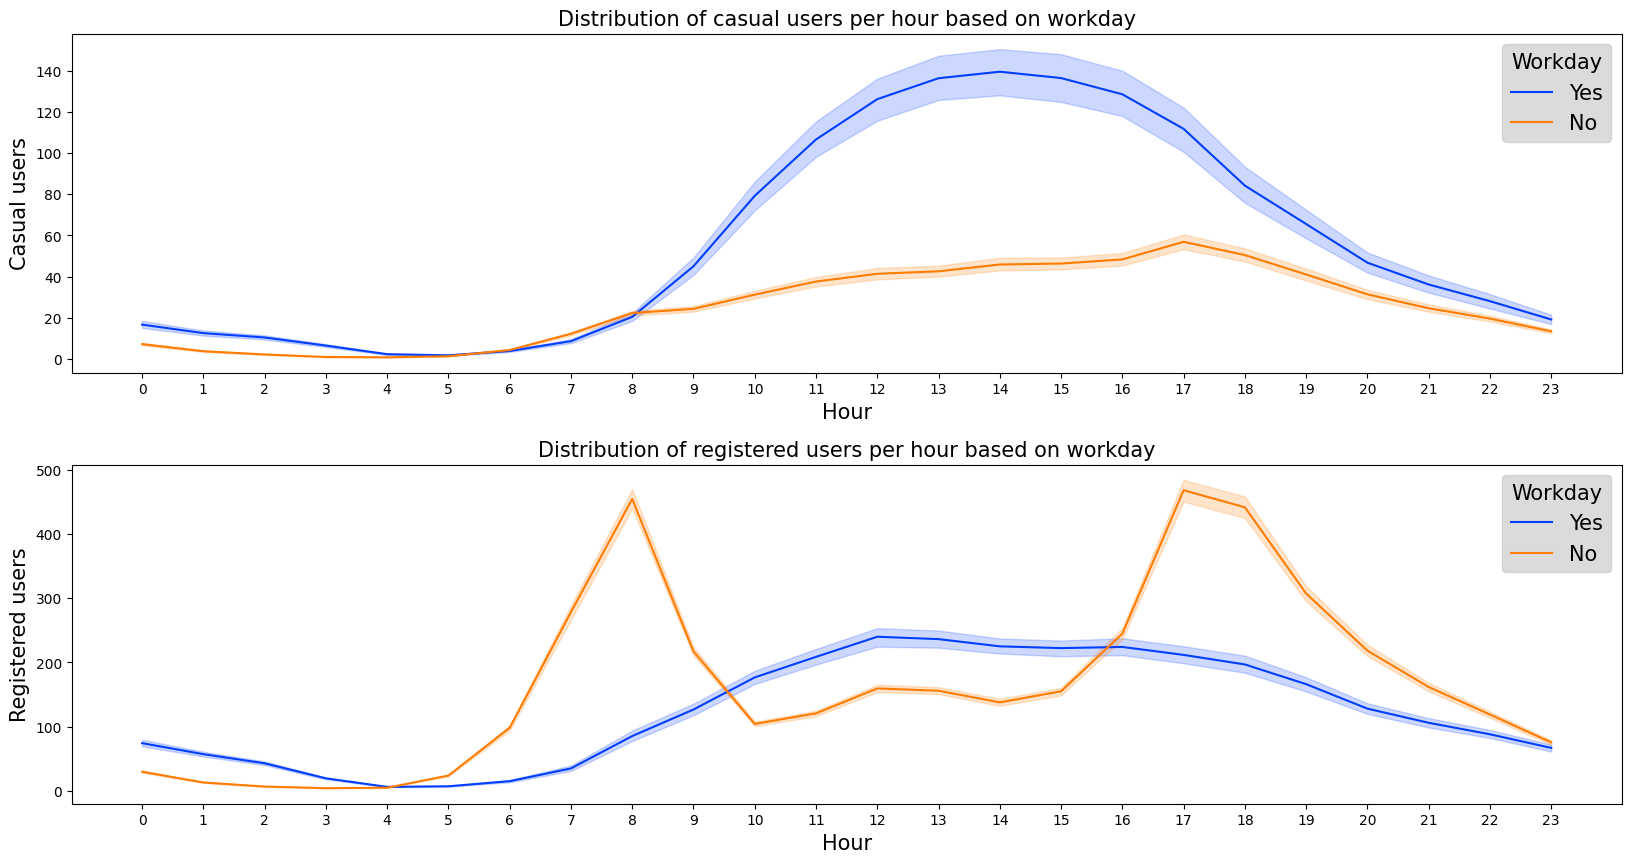

In [106]:
hue_order = ['Weekend', 'Weekday']

fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), nrows=2)

sns_lineplot1 = sns.lineplot(x='hour', y='casual', hue='day_type', hue_order=hue_order, palette='bright', data=bike_sharing_hour_df, ax=ax1)
ax1.set_title('Distribution of casual users per hour based on workday', fontsize=15)
ax1.set_xlabel('Hour', fontsize=15)
ax1.set_xticks(range(0, 24))
ax1.set_ylabel('Casual users', fontsize=15)

handles, labels = ax1.get_legend_handles_labels()

ax1.legend(handles=handles, labels=['Yes', 'No'], loc='upper right', fontsize=15, title='Workday', title_fontsize=15, facecolor='lightgray', framealpha=0.8)

sns_lineplot2 = sns.lineplot(x='hour', y='registered', hue='day_type', hue_order=hue_order, palette='bright', data=bike_sharing_hour_df, ax=ax2)
ax2.set_title('Distribution of registered users per hour based on workday', fontsize=15)
ax2.set_xlabel('Hour', fontsize=15)
ax2.set_xticks(range(0, 24))
ax2.set_ylabel('Registered users', fontsize=15)

ax2.legend(handles=handles, labels=['Yes', 'No'], loc='upper right', fontsize=15, title='Workday', title_fontsize=15, facecolor='lightgray', framealpha=0.8)

plt.subplots_adjust(hspace=0.27)
plt.show()


Casual users cenderung menggunakan sepeda lebih sering pada hari libur, sedangkan registered userscenderung menggunakan sepeda lebih sering  pada hari kerja

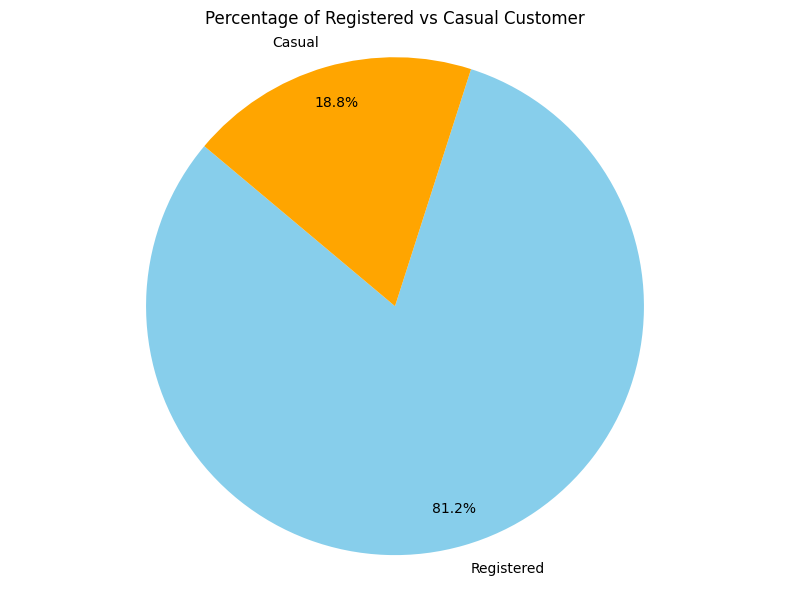

In [108]:
total_registered = hour_df['registered'].sum()
total_casual = hour_df['casual'].sum()
labels = ['Registered', 'Casual']
sizes = [total_registered, total_casual]
colors = ['skyblue', 'orange']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.axis('equal')
plt.title('Percentage of Registered vs Casual Customer')
plt.tight_layout()
plt.show()

Peminjam sepeda yang terdaftar jauh lebih banyak daripada peminjam casual dengan persentase 81.2%. Namun peminjam casual hanya memiliki persentase kurang dari 20% selama 2 tahun tersebut.

## Pertanyaan 4: Pada jam berapa penggunaan sepeda mencapai puncaknya dalam sehari? [NEW]

In [113]:
print(bike_sharing_hour_df['day'].unique())

['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


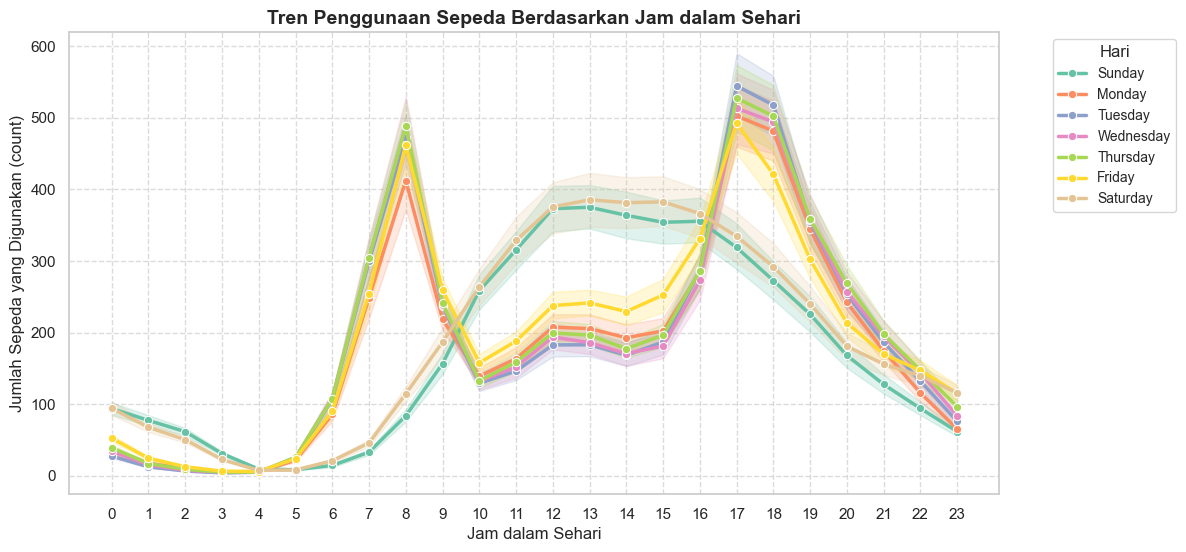

In [115]:
# Mengatur tema seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=bike_sharing_hour_df, 
    x='hour', 
    y='count', 
    hue='day', 
    palette='Set2', 
    linewidth=2.5, 
    marker="o"
)

plt.title('Tren Penggunaan Sepeda Berdasarkan Jam dalam Sehari', fontsize=14, fontweight='bold')
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Digunakan (count)', fontsize=12)

plt.xticks(np.arange(0, 24, 1))

plt.grid(True, linestyle="--", alpha=0.7)

plt.legend(title="Hari", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.show()

**Insight:**
* Grafik yang disajikan menunjukkan bahwa puncak penggunaan sepeda terjadi pada sore hari, terutama antara pukul empat hingga lima sore. Selain itu, lonjakan jumlah pengguna juga tampak pada pukul delapan pagi, menunjukkan adanya dua periode utama dengan tingkat penggunaan sepeda yang tinggi.

## Pertanyaan 5: Sejauh mana suhu memengaruhi pilihan seseorang untuk bersepeda? [NEW]

In [118]:
# Membuat batas untuk setiap kategori suhu
bins = [bike_sharing_hour_df['atemp'].min(), 0.25, 0.75, bike_sharing_hour_df['atemp'].max()]
labels = ['Cold', 'Mild', 'Hot']

# Buat kolom baru 'temp_category' berdasarkan kategori suhu
bike_sharing_hour_df['temp_category'] = pd.cut(bike_sharing_hour_df['atemp'], bins=bins, labels=labels, include_lowest=True)

# Tampilkan DataFrame dengan kolom 'temp_category'
bike_sharing_hour_df[['atemp', 'temp_category']]

,atemp,temp_category
0,0.2879,Mild
1,0.2727,Mild
2,0.2727,Mild
3,0.2879,Mild
4,0.2879,Mild
...,...,...
17374,0.2576,Mild
17375,0.2576,Mild
17376,0.2576,Mild
17377,0.2727,Mild


**Insight:**
* Membagi kolom atemp (suhu aktual pada dataset) menjadi 3 kategori, yakni cold, mild, dan hot.
* *bins* digunakan untuk membagi suhu dalam 3 kategori, dengan nilai:
  1. Suhu < 0.25 dianggap cold (dingin).
  2. Suhu antara 0.25 dan 0.75 dianggap mild (sedang).
  3. Suhu > 0.75 dianggap hot (panas).
* *labels* digunakan untuk memberi label kategori suhu.

In [120]:
temp_grouped = bike_sharing_hour_df.groupby('temp_category', observed=True)['count'].mean().reset_index()

In [121]:
temp_grouped

,temp_category,count
0,Cold,76.246926
1,Mild,198.835438
2,Hot,308.463415


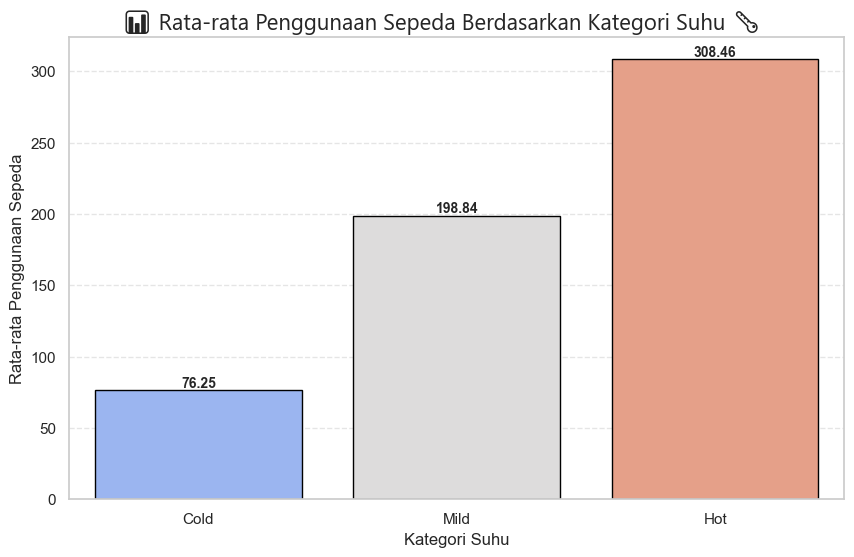

In [122]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x='temp_category', 
    y='count', 
    hue='temp_category',  
    data=temp_grouped, 
    palette='coolwarm', 
    legend=False,      
    edgecolor='black'
)


for index, value in enumerate(temp_grouped['count']):
    plt.text(index, value + 2, f'{value:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.title('📊 Rata-rata Penggunaan Sepeda Berdasarkan Kategori Suhu 🌡️',
          fontsize=16, fontweight='bold', fontname='Segoe UI Emoji')

plt.xlabel('Kategori Suhu', fontsize=12)
plt.ylabel('Rata-rata Penggunaan Sepeda', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)  # Grid yang lebih halus
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


**Insight:** <br>
Dengan menerapkan metode **clustering binning** menunjukkan hasil analisis mengindikasikan adanya perbedaan signifikan dalam jumlah pengguna sepeda yang dipengaruhi oleh suhu. Jumlah pengguna sepeda cenderung meningkat saat suhu lebih tinggi (hot), yang menunjukkan preferensi mereka terhadap cuaca yang lebih hangat.

## Conclusion
Berdasarkan proses analisis data yang dilakukan menggunakan dataset Bike-Sharing atau Bisnis Peminjaman Sepeda ini dengan beberapa pertanyaan bisnis yang telah disebutkan diawal, dapat disimpulkan sebagai berikut.

Berdasarkan proses analisis data yang dilakukan menggunakan dataset Bike-Sharing atau Bisnis Peminjaman Sepeda ini dengan beberapa pertanyaan bisnis yang telah disebutkan diawal, dapat disimpulkan sebagai berikut:

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda? <br>
   Musim panas dan musim gugur adalah musim puncak untuk penyewaan sepeda, sedangkan musim semi dan musim dingin menunjukkan permintaan yang lebih rendah. Strategi pengelolaan sepeda dapat difokuskan pada penambahan jumlah sepeda atau promosi aktif selama musim panas dan gugur, sementara musim dingin dan semi mungkin memerlukan promosi atau insentif untuk meningkatkan penggunaan.
   
2. Bagaimana performa peminjaman sepeda perbulan pada tahun 2011 hingga 2012? <br>
   Performa peminjaman sepeda pada tahun 2011 hingga 2012 mengalami peningkatan yang cukup baik dimana peningkatan yang signifikan akan terjadi diantara kuartal 2 hingga kuartal 3 tiap tahunnya dan mengalami penurunan di kuartal akhir tahun.

   
3. Berapa perbandingan dan persentase pengguna yang merupakan pelanggan terdaftar (registered) dibandingkan pengguna kasual (casual)? <br>
   Pengguna sepeda rental biasa (casual) dengan terdaftar (registered) memiliki puncak yang sangat berbeda, hal ini dikarenakan pengguna biasa menggunakan sepedanya untuk kegiatan rekreasi pada hari libur, dimana pengguna terdaftar menggunakan sepedanya untuk pulang pergi kerja dan jumlah pengguna sepeda yang registered dan casual lebih banyak yang registered dengan selisih yang cukup signifikan. Hal ini menunjukkan pemasaran bisnis ini perlu diperluas untuk menarik perhatian peminjam baru dan tidak hanya pelanggan yang terdaftar saja.

4. Pada jam berapa penggunaan sepeda mencapai puncaknya dalam sehari? [NEW] <br>Penggunaan sepeda mencapai puncaknya pada dua waktu utama, yaitu pukul delapan pagi dan antara pukul empat hingga lima sore. Hal ini bisa terjadi dikarenakan diwaktu tersebut adalah waktu berangkat dan pulang kerja.

5. Sejauh mana suhu memengaruhi pilihan seseorang untuk bersepeda? [NEW] <br>
Dengan analisis menggunakan metode clustering binning menunjukkan bahwa pengguna lebih banyak bersepeda ketika suhu lebih hot/panas, menandakan kecenderungan mereka terhadap cuaca yang lebih hangat.

### Menyimpan dataframe 'bike_sharing_hour_df' dan 'bike_sharing_day_df' dalam bentuk csv

In [273]:
# bike_sharing_day_df.to_csv("Dashboard/bike_sharing_day_df.csv", index=False)

In [275]:
# bike_sharing_hour_df.to_csv("Dashboard/bike_sharing_hour_df.csv", index=False)